# Useful Function for Data Analysis

In [187]:
# Importing basic functions
import pandas as pd
import missingno as mano
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt 
import statistics as st
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro# Importing basic functions
import pandas as pd
import missingno as mano
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt 
import statistics as st
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import matplotlib
from matplotlib.pyplot import figure
# Importinf Clasification Regression Related Functions
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn import metrics
import xgboost as xgb
# This function read data from excel and csv files to dataframe.
# Input Arguments file: File name with path (Eg: 'D:/data/dataread.csv'), f_type: File Type (Eg: 'csv',default csv)
def file_todataframe(file,f_type):
    if f_type == 'csv':  
        return pd.read_csv(file)
    elif f_type == 'excel': 
        return pd.read_excel(file)
    elif f_type == 'json': 
        return pd.read_json(file)
    
# This function display shape, data type, data near head and tail of given data fram.
# Input Arguments df: dataframe, n: No f data points to display
def df_details(d_f,n):
    print('Data Types of Column: \n',d_f.dtypes)
    print('\n Size of Datarame: ',d_f.shape)
    print('\n Top and bottom ',n,' rows: \n')
    display(d_f.head(n).append(d_f.tail(n)))

# This function drops irrelevant columns
# Input Arguments df: dataframe, col_del: Value or index array of column to delete (Eg: [1,3,5] or ['Names',Sales]), 
# typ: 1 for column index and 0 for column name in col_del
def col_drop(d_f,col_del,typ=0):
    if typ == 0:
        d_f = d_f.drop(col_del,axis=1)
    elif typ == 1:
        d_f = d_f.drop(df.columns[col_del],axis=1)
    return d_f

# This function drops rows with particular column values
# Input Arguments df: dataframe, row_del: Delete if row with given value,
# col_ref: Name of column to check for row values (Eg:['Names']), 
def row_drop(d_f,row_del,col_ref):
    d_f = d_f.drop(d_f[d_f[col_ref] == row_del].index)
    return d_f

# This function give deatials for missing values in data
# Input Arguments df: dataframe
def miss_ch(d_f):
    print('Available data with no nulls: ', d_f.dropna().shape[0])
    display('Deatils of Null values column wise',d_f.isnull().sum())
    
# This function give deatials for missing values in data
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# graph: Types of graph to display. (Eg: ['bar','matrix','heatmap','dendrogram'],['all'] default 'all')
def miss_viz(d_f,col_int = 'all',graph = 'all'):
    import missingno as mano
    av_gp = ['bar','matrix','heatmap','dendrogram']
    col_nam = d_f.columns
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 
    
    if graph == 'all':
        graph = av_gp
    elif not all(i in av_gp for i in graph):
        print("Invalid Graph type, select 'bar','matrix','heatmap','dendrogram'")
        return
    
    for gp in graph:
        getattr(mano, gp)(d_f[col_int])

# This function fill missing values
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# metd: Types of graph to display. (Option: {0(float),‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, 'linear'} default None)
def fill_miss(d_f,col_int = 'all',metd = None):
    col_nam = d_f.columns
    av_method = ['backfill', 'bfill', 'pad', 'ffill', 'linear']
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return d_f
    
    if metd == None:
        return d_f
    elif (type(metd) == int) | (type(metd) == float):
        print('yes')
        return d_f[col_int].fillna(metd)  
    elif metd == 'linear':
        return d_f[col_int].interpolate(method = 'linear') 
    elif  metd in av_method:
        return d_f[col_int].fillna(method = 'ffill')
    else:
        print("Invalid fill type")
        return d_f

# Function for Numerical Data Analysis
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# func: Types of graph and function. (Option: {'distplot','boxpot','scatterplot','describe','normality'} default all)
def data_num(d_f,col_int = 'all',func = 'all',scat = None):
    from scipy.stats import shapiro
    from statsmodels.graphics.gofplots import qqplot
    av_func = ['hist','boxplot','scatter','describe','normality']
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_nam = d_f.select_dtypes(include=numerics).columns
    #Checking Parameter Column names
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 
    
    #Checking Parameter available function
    if func == 'all':
        func = av_func
    elif not all(i in av_gp for i in graph):
        print("Invalid Graph type, select 'distplot','boxpot','scatterplot','describe','normality'")
        return
    if scat is None:
        scat = df.columns[0]
    
    
    for fn in func:
        if fn == 'describe':
            display("Statictical Details",df[col_int].describe())
        else:
            for col in col_int:
                if fn == 'normality':
                    #qqplot(df[col])
                    print("Normality Test for: ",col)
                    stat, p = shapiro(df[col])
                    if p > 0.05:
                        print('Sample looks Gaussian. Statistics=%.3f, p=%.3f'% (stat, p))
                    else:
                        print('Sample does not look Gaussian. Statistics=%.3f, p=%.3f'% (stat, p))
                elif fn == 'scatter':
                    display(col)
                    plt.scatter(df[col],df[scat])  
                    plt.show()
                else:
                    display(col)
                    getattr(plt, fn)(df[col])   
                    plt.show()
                    
# Function for Categorical Data Analysis
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all')
def data_cat(d_f,col_int = 'all',bar = None):
    import matplotlib.pyplot as plt
    col_nam = d_f.select_dtypes(include=['object','category']).columns
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_num = d_f.select_dtypes(include=numerics).columns   
    #Checking Parameter Column names
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 

    if not ((bar in col_num) | (bar is None)):
        print("Only numeric column for Bar")
        return 
    if not (bar is None):
        for col in col_int:
            plt.figure(figsize=(8,5))
            plt.bar(d_f[col], d_f[bar])
            plt.show()
        return
    for col in col_int:
        plt.suptitle(col)
        d_f[col].value_counts().plot(kind='bar')
        plt.show()

# Function for Canging column type
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# dtyp: New data types of coloumn default int
def col_dtype(d_f,col_int,dtyp = int):
    d_f = deep_copy(d_f)
    av_fun = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','int','float','str','category']
    col_nam = d_f.columns
    #Checking Parameter Column names
    if not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return d_f
    #Checking Parameter available function
    if not dtyp in av_fun:
        print("Invalid data type")
        return d_f
    
    d_f[col_int] = d_f[col_int].astype(dtyp,errors='ignore')
    return d_f

# Function for Canging column type
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# opr: Operation to be performed on coloumn values, val = [old value, new value]
def col_opre(d_f,col_int,opr = None,val = None):
    col_nam = d_f.select_dtypes(include=['object']).columns
    av_opr = ['str_replace','rm_space','chg_value']
    
    #Checking Parameter Column names
    if not (col_int in col_nam):
        print("Invalid column name")
        return d_f

    if opr == 'str_replace':
        d_f[col_int] = d_f[col_int].str.replace(val[0], val[1])
        return d_f
    elif opr == 'rm_space':
        d_f[col_int] = d_f[col_int].str.replace(' ', '')
        return d_f
    elif opr == 'chg_value':
        d_f[col_int] = d_f[col_int].replace(val[0], val[1])
        return d_f
    else:
        print("Invalid Opeation")
        return d_f
    
# Function for Performing numerical operations to column values
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# opr: Operation to be performed on coloumn values, val: value to apply on column
def col_opre(d_f,col_int = 'all',opr = None,val = None):
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64',]
    col_num = d_f.select_dtypes(include=numerics).columns  


    if opr == 'add':
        d_f[col_int] = d_f[col_int]+val
        return d_f
    elif opr == 'sub':
        d_f[col_int] = d_f[col_int]-val
        return d_f
    elif opr == 'mul':
        d_f[col_int] = d_f[col_int]*val
        return d_f
    elif opr == 'div':
        d_f[col_int] = d_f[col_int]/val
        return d_f
    else:
        print("Invalid Opeation")
        return d_f

# Function for creating a deep copy
# Input Arguments df: dataframe, Output data frame copy
def deep_copy(d_f):
    return d_f.copy(deep=True)

# Function for coding Categorical variable  to Numeric
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'{must be string}), 
# coding_type: Coding type to apply{'label','binary','ordinal','onehot'} default,label, contain: For binary
def cat_num(d_f,col_int,coding_type = 'label',contain=None,X = None):
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder
    d_f = deep_copy(d_f)
    col_nam = d_f.select_dtypes(include=['object']).columns
    if not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return d_f
    else: 
        d_f[col_int] =  d_f[col_int].astype('str')
        
    if coding_type == 'label':
        for col in col_int:
            d_f[col] = d_f[col].astype('category')
            d_f[col] = d_f[col].cat.codes
        return d_f
    elif coding_type == 'binary':
        for col in col_int:
            d_f[col] = np.where(d_f[col].str.contains(contain), 1, 0)
        return d_f
    elif coding_type == 'ordinal':
        for col in col_int:
            ord_enc = OrdinalEncoder()
            d_f[col] = ord_enc.fit_transform(d_f[[col]])
        return d_f
    elif coding_type == 'onehot':
        for col in col_int:
            temp = pd.get_dummies(d_f[col], prefix=col)
            d_f = d_f.join(temp)
            d_f = col_drop(d_f,col)
        return d_f
    else:
        display("Invalid Ending Method")
        return d_f
    
# This function scatter Plot
# Input Arguments df: dataframe, col_int: Two columns of intrest (Eg: ['Sale','Customer'],['all']), 
def scatter_plot(d_f,col_int = None):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_nam = d_f.select_dtypes(include=numerics).columns
    if (col_int is None) & (not all(i in col_nam for i in col_int)) & (len(col_int) != 2):
        print("Invalid column name")
        return 
    x = d_f[col_int[0]]
    y = d_f[col_int[1]]
    xv = col_int[0]+' X- Value'
    yv = col_int[1]+' Y- Value'
    tit = col_int[0] + ' vs ' + col_int[1] +' Scatter plot'

    plt.scatter(x, y)
    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.title(tit)
    plt.xlabel(xv)
    plt.ylabel(yv)
    plt.show()

# Function for applyng Machine learning Models
# Input Arguments df with last raw as labels, task: regression or classification, algo: Descion Tree or Random Forest
def anova(d_f,col_int='all',col_main=None):
    from scipy import stats
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64',]
    col_num = d_f.select_dtypes(include=numerics).columns 
    
    #Checking Parameter Column names
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 
    
    for col in col_int:
        model = ols(col_main+'~ C(Q("'+col+'"))', data=d_f).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print ("\nAnova =>",col_main," - ",col)
        display(anova_table)

## T Test
def t_test(d_f,col_ind=[1,2]):
    data1 = d_f.iloc[:,col_ind[0]].values
    data2 = d_f.iloc[:,col_ind[1]].values
    # calculate means
    mean1, mean2 = st.mean(data1), st.mean(data2)
    # calculate sample standard deviations
    std1, std2 = st.stdev(data1), st.stdev(data2)
    # calculate standard errors
    n1, n2 = len(data1), len(data2)
    se1, se2 = std1/mt.sqrt(n1), std2/mt.sqrt(n2)
    # standard error on the difference between the samples
    sed = mt.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    print('T Test Statistics=%.3f' % (t_stat))

## Normality Test
def norm(d_f,col_ind=[1]):
    for col in col_ind:
        data = d_f.iloc[:,col]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        data.hist()
        
# This function Correlation Heat Map
# Input Arguments d_f: dataframe
def corr_hmap(d_f):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(15,8)})
    corr = d_f.corr().dropna(1,'all').dropna(0,'all')
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        horizontalalignment='right'
    );
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=0,
        horizontalalignment='right'
    );    

# Function for applyng Machine learning Models
# Input Arguments df with last raw as labels, task: regression or classification, algo: Descion Tree or Random Forest
def ml_algo(X_train, X_test, y_train, y_test,algo = 'decisiontree',task = 'Reg',n=3):

    #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
    if task == 'Reg':
        if algo == 'decisiontree':
            model = DecisionTreeRegressor(max_depth=n)

        elif algo == 'randomforest':
            model = RandomForestRegressor(n_estimators = n, random_state = 42)
            
        elif algo == 'knn':
            model = KNeighborsRegressor(n_neighbors=n)
            
        elif algo == 'lreg':
            model = LinearRegression()
            
        elif algo == 'svm':
            model = SVR(kernel="rbf")
            
        elif algo == 'gboost':
            model = GradientBoostingRegressor()
            
        elif algo == 'adaboost':
            model = AdaBoostRegressor(random_state=0, n_estimators=100)
            
        else:
            print("Invalid Algorithm")
            return  
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r_2 = r2_score(y_test, y_pred)
        r_2adj = r2_score(y_test, y_pred,multioutput='variance_weighted')
        return mae,mse,r_2,r_2adj,model
        
    elif task == 'Class':    
        if algo == 'decisiontree':
            model = DecisionTreeClassifier(max_depth=n) 
        
        elif algo == 'randomforest':
            model=RandomForestClassifier(n_estimators=n)
            
        elif algo == 'knn':
            model = KNeighborsClassifier(n_neighbors=n)
            
        elif algo == 'gboost':
            model = GradientBoostingClassifier()
            
        elif algo == 'adaboost':
            model = AdaBoostClassifier(n_estimators=100, random_state=0)
            
        elif algo == 'svc':
            model = svm.SVC()
            
        elif algo == 'naive':
            model = GaussianNB()
            
        elif algo == 'xgboost':
            model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
            
        elif algo == 'mlp':
            model = MLPClassifier(hidden_layer_sizes=5)
            
        elif algo == 'logit':
            model = LogisticRegression()            
        else:
            print("Invalid Algorithm")
            return
        

        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        c_m =confusion_matrix(y_test, y_pred)
        c_r = classification_report(y_test, y_pred)
        acc_sc = accuracy_score(y_test, y_pred)

        fpr , tpr, _ = roc_curve(y_test, y_pred)
        auc_roc = metrics.auc(fpr, tpr)
        
        logloss = log_loss(y_test, y_pred)       
        #Precision
        pre_l = precision_score(y_test, y_pred)*100
        #Recall
        recall_l = recall_score(y_test, y_pred)*100
        return c_m,c_r,acc_sc,auc_roc,logloss,model,pre_l,recall_l
    
# Data frame with output variable at first location
# f_s features to select
def feature_selectk(d_f,f_s):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif
    from sklearn.model_selection import train_test_split

    x = d_f.iloc[:,1:len(d_f)-1]
    y = d_f.iloc[:,:1]
    fs = SelectKBest(score_func=f_classif, k=f_s)
    # learn relationship from training data
    fs.fit(x, y)
    # transform train input data
    x_fs = fs.transform(x)
    return x_fs,y,fs

def feature_select_rffs(x,y,reg=True):
    from sklearn.feature_selection import SelectFromModel
    if reg:
        sel = SelectFromModel(RandomForestRegressor(n_estimators = 50))
    else:
        sel = SelectFromModel(RandomForestClassifier(n_estimators = 50))
    sel.fit(x, y)
    selected_feat= x.columns[(sel.get_support())]
    return selected_feat

def importantfeat_rffs(d_f,reg=True): 
    # random forest for feature importance on a regression problem
    from sklearn.datasets import make_regression
    from sklearn.ensemble import RandomForestRegressor
    from matplotlib import pyplot
    # define dataset
    X = d_f.iloc[:,1:len(d_f.columns)]
    y = d_f.iloc[:,:1]
    # define the model
    model = RandomForestRegressor()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    
# kfoldtype = KFold , StratifiedKFold
def ml_algo_cv(X,y,algo = 'decisiontree',task = 'Reg',n=3,split=10,kftype ='skfold'):
    accf = 0
    aucf = 0
    pref = 0
    recallf = 0
    i= 0
    if kftype == 'skfold':
        kf = StratifiedKFold(n_splits=split, random_state=None, shuffle=False)
    elif kftype == 'kfold':
        kf = KFold(n_splits=split, random_state=None, shuffle=False)
        
    for train_index, test_index in kf.split(X,y):
        trainX, testX = X.iloc[train_index], X.iloc[test_index] 
        trainY, testY = y.iloc[train_index], y.iloc[test_index]
        cm,cr,acc,auc,ll,mdl,pre,recall = ml_algo(trainX, testX, trainY, testY,algo = algo ,task = task,n=3)
        accf = accf + acc
        aucf = aucf + auc
        pref = pref + pre
        recallf = recallf + recall 
        i = i + 1
    accf = accf/i
    aucf = auc/i
    pref = pref/i
    recallf = recallf/i
    return accf,aucf,pref,recallf,cm

## Upsampling minority class and down sampling majority class 
def class_imbalance(d_f,resmpl=0.75,minor=0,col=None):
    df_majority = row_drop(df,minor+1,col[0])
    df_minority = row_drop(df,minor,col[0])
    resmplc = mt.ceil(mt.ceil(df[col].value_counts()[minor]* 0.75) * resmpl)
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=resmplc,    # to match majority class
                                     random_state=123) # reproducible results
    df_majority_under = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=resmplc,    # to match majority class
                                 random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_smp = pd.concat([df_majority_under, df_minority_upsampled])
    # Display new class counts
    #print(df_smp[col].value_counts())
    return df_smp

def con_mat(con_mat,lab = ['x-label','y-label']):
    import seaborn as sns
    import matplotlib.pyplot as plt   
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", ax = ax,cmap="YlGnBu"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([lab[0],lab[1]]); ax.yaxis.set_ticklabels([lab[0],lab[1]]);

# FS: Feature Selection
# CV: Cross Validiation
# CI: CLass Imbalance
def ml_com(d_f,colum,algor='decisiontree',fs=True,cv=True,ci=True,resmpl = 0.75):
    x = col_drop(d_f,colum,typ=0)
    y = d_f[colum]
    if fs & cv & ci:
        df_samp = class_imbalance(d_f,resmpl = resmpl,minor=0,col=colum)
        fet = feature_select_rffs(x,y,reg=False)
        x = col_drop(df_samp,colum,typ=0)
        x = x[fet]
        y = df_samp[colum]
        acc,auc,pre,recall,cm = ml_algo_cv(x,y,algo = algor,task = 'Class',n=3,split=10,kftype ='skfold')
        
    elif fs & ~cv & ~ci:
        fet = feature_select_rffs(x,y,reg=False)
        x = col_drop(d_f,colum,typ=0)
        x = x[fet]
        y = d_f[colum]
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
        cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = algor,task = 'Class',n=3)
    elif ~fs & ~cv & ci:
        df_samp = class_imbalance(d_f,resmpl = resmpl,minor=0,col=colum)
        x = col_drop(df_samp,colum,typ=0)
        y = df_samp[colum]
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
        cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = algor,task = 'Class',n=3)
    elif ~fs & ~cv & ~ci:
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
        cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = algor,task = 'Class',n=3)

    return acc,auc,pre,recall,cm

# EDA on Telecom Customer Churn Dataset

In [93]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Reading File
df =  file_todataframe('Customer_Churn.csv','csv')

In [38]:
#Data Details
df_details(df,3)

Data Types of Column: 
 Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

 Size of Datarame:  (5986, 22)

 Top and bottom  3  rows: 



,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
5985,860,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.3,No


In [39]:
# Total Charges should be numeric
df = col_opre(df,'TotalCharges',opr='rm_space')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df_details(df,3)

Invalid Opeation
Data Types of Column: 
 Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

 Size of Datarame:  (5986, 22)

 Top and bottom  3  rows: 



,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
5985,860,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,No


In [50]:
#Checking if any missing values
miss_ch(df)

Available data with no nulls:  5986


'Deatils of Null values column wise'

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [51]:
# Droping rows  with missing values in Total charges as this variable seems impoartant(background knowledge)
df = df.dropna()
miss_ch(df)

Available data with no nulls:  5986


'Deatils of Null values column wise'

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [52]:
# Droping column which will not be used in ML
# Customer number is of no use in classification
#Unnammed 0 is not define in description and seems like SNo which is of no use.
df = col_drop(df,['Unnamed: 0','customerID'])

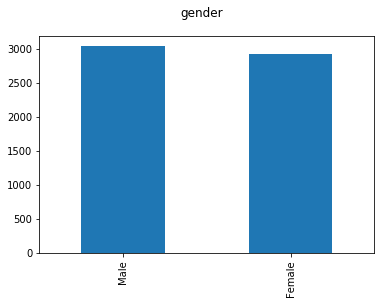

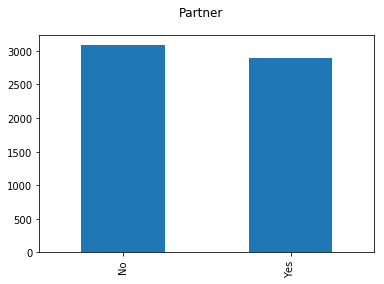

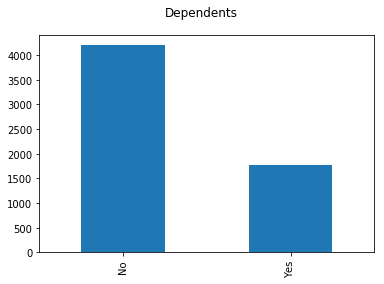

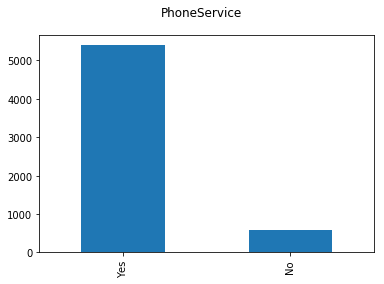

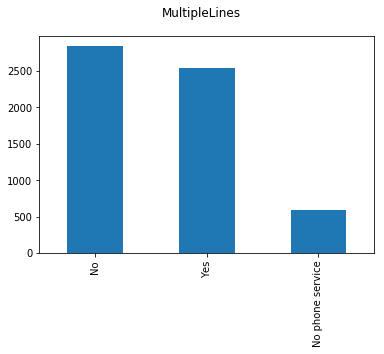

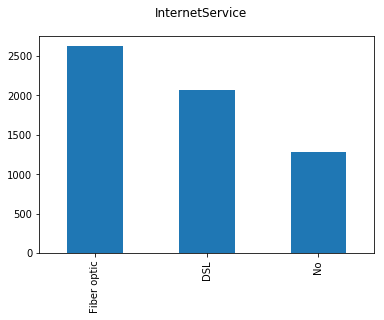

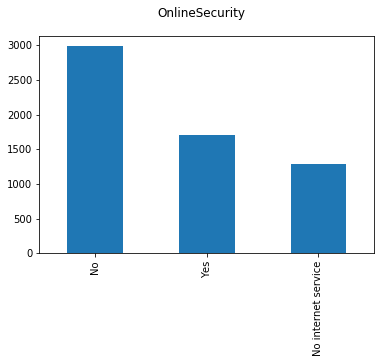

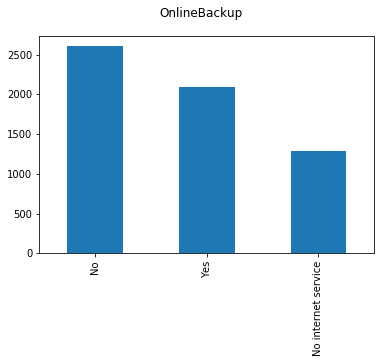

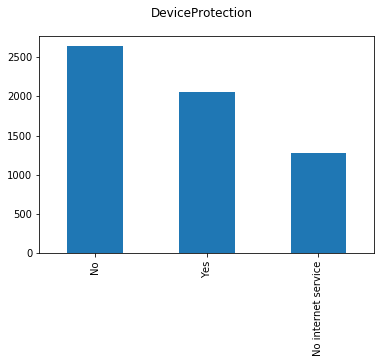

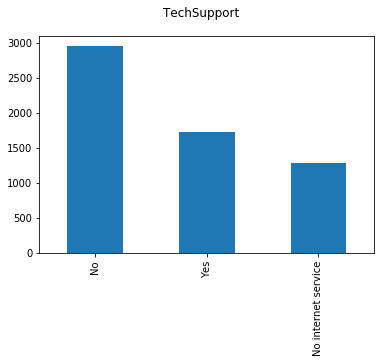

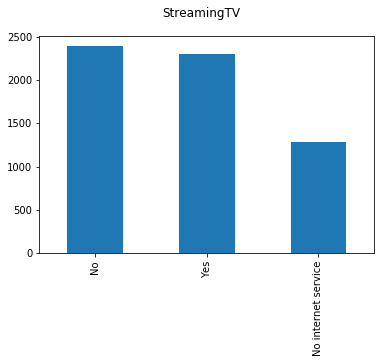

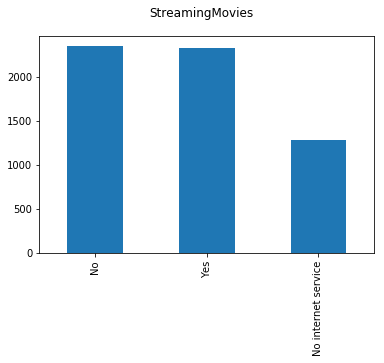

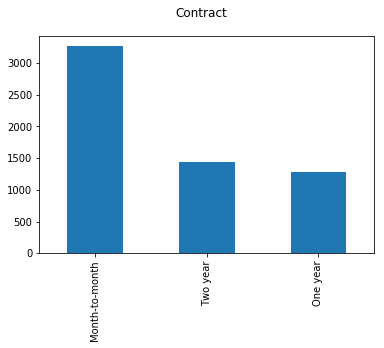

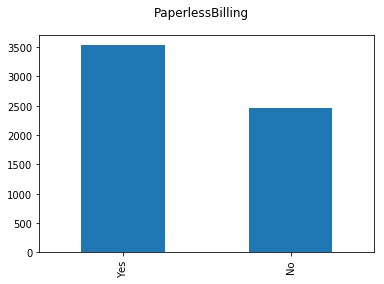

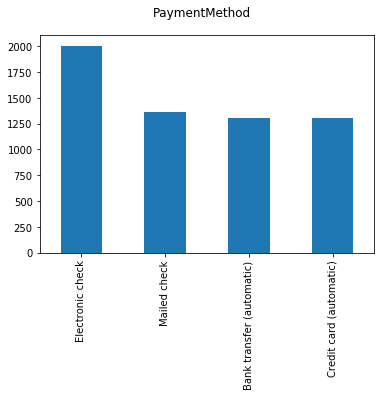

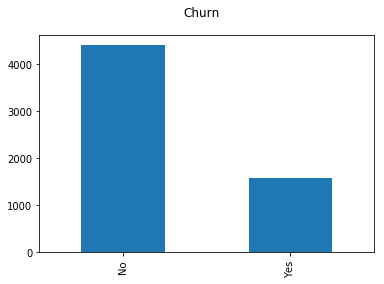

In [32]:
## Analysing Categorical Variables for conversion using function(from Self written)
# Below custom made function will show bar graph of all non numeric variables
data_cat(df)

Based on visual analysis we can now easily select appropriate conversion method.
Following varibales need to be converted to different classes.
### To Binary:
    gender 
    Partner 
    Dependents 
    PaperlessBilling 
    PhoneService
### To Categorcal coding
    InternetService
    OnlineSecurity
    OnlineBackup
    DeviceProtection
    TechSupport
    StreamingTV
    StreamingMovies
### To Ordinal
    Contract
### Onehot Encoding
    PaymentMethod
### Output variable 
    Churn

In [53]:
# Variable with yes No or Male, Female can be converted to binary 
colms = ['Churn','Partner','Dependents','PaperlessBilling','PhoneService']
df = cat_num(df,colms,coding_type = 'binary',contain='Yes')
df = cat_num(df,['gender'],coding_type = 'binary',contain='Male')

In [54]:
# Variable with yes No can be converted to Categorical coding 
colms = ['InternetService', 'MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']
df = cat_num(df,colms,coding_type = 'label')

In [55]:
# Variable with yes No can be converted to Ordinal 
df = cat_num(df,['Contract'],coding_type = 'ordinal')

In [56]:
# Variable with yes No can be converted to One hot Encoding 
df = cat_num(df,col_int=['PaymentMethod'],coding_type = 'onehot')

In [81]:
#Converting Total Charges in Numeric
df['TotalCharges']  = df['TotalCharges'].astype(float,errors='ignore')

In [198]:
df_details(df,5)

Data Types of Column: 
 Churn                                      category
gender                                        int32
SeniorCitizen                                 int64
Partner                                       int32
Dependents                                    int32
tenure                                        int64
PhoneService                                  int32
MultipleLines                                  int8
InternetService                                int8
OnlineSecurity                                 int8
OnlineBackup                                   int8
DeviceProtection                               int8
TechSupport                                    int8
StreamingTV                                    int8
StreamingMovies                                int8
Contract                                    float64
PaperlessBilling                              int32
MonthlyCharges                              float64
TotalCharges                            

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,72,1,2,2,1,...,1,1,2.0,0,24.10,0.0,0,1,0,0
1,0,0,0,0,0,44,1,0,1,0,...,2,0,0.0,1,88.15,0.0,0,1,0,0
2,1,0,1,1,0,38,1,2,1,0,...,0,0,0.0,1,74.95,1.0,1,0,0,0
3,0,1,0,0,0,4,1,0,0,0,...,0,2,0.0,1,55.90,0.0,0,0,1,0
4,0,1,0,0,0,2,1,0,0,2,...,0,0,0.0,0,53.45,0.0,0,0,1,0
5981,1,1,0,1,0,1,1,0,1,2,...,2,2,0.0,1,95.00,1.0,0,0,1,0
5982,0,0,0,1,1,23,1,2,0,2,...,2,2,2.0,1,91.10,0.0,0,1,0,0
5983,0,1,0,1,1,12,1,0,2,1,...,1,1,0.0,1,21.15,0.0,0,0,1,0
5984,1,1,1,0,0,12,1,2,1,0,...,2,2,0.0,1,99.45,1.0,0,0,1,0
5985,0,1,0,0,0,26,1,0,2,1,...,1,1,1.0,0,19.80,0.0,0,1,0,0


In [58]:
## Moving Output variable to first position as with previous datasets.
first_col = df.pop('Churn')
df.insert(0, 'Churn', first_col)
df.head(5)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,72,1,2,2,1,...,1,1,2.0,0,24.10,1734.65,0,1,0,0
1,0,0,0,0,0,44,1,0,1,0,...,2,0,0.0,1,88.15,3973.2,0,1,0,0
2,1,0,1,1,0,38,1,2,1,0,...,0,0,0.0,1,74.95,2869.85,1,0,0,0
3,0,1,0,0,0,4,1,0,0,0,...,0,2,0.0,1,55.90,238.5,0,0,1,0
4,0,1,0,0,0,2,1,0,0,2,...,0,0,0.0,0,53.45,119.5,0,0,1,0


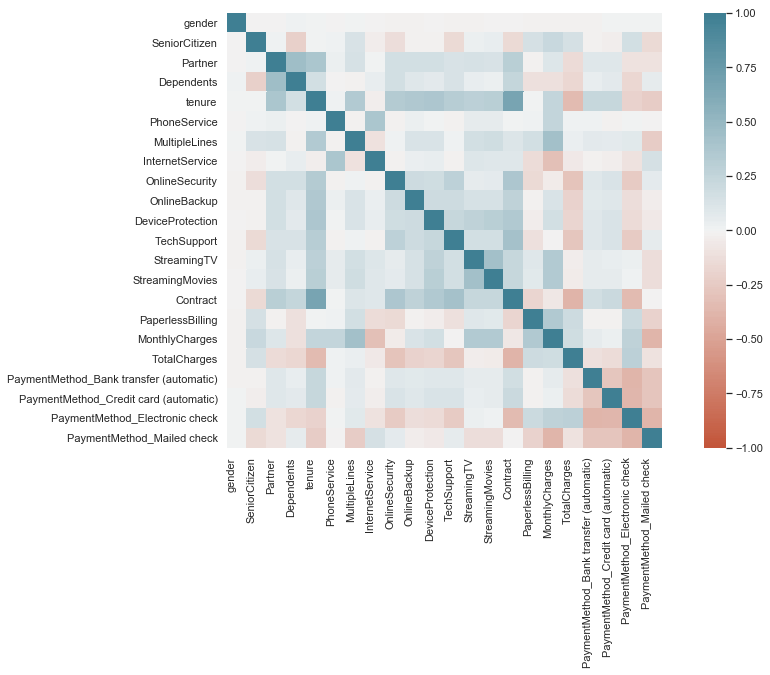

In [197]:
## Calling corellation heat map funtion but useless since too many features
corr_hmap(df)

### Checking the Class balance
As these types of problems have usually class imbalnce issue.

In [60]:
 df = col_dtype(df,['Churn'],dtyp = 'category')

In [196]:
df.dtypes

Churn                                      category
gender                                        int32
SeniorCitizen                                 int64
Partner                                       int32
Dependents                                    int32
tenure                                        int64
PhoneService                                  int32
MultipleLines                                  int8
InternetService                                int8
OnlineSecurity                                 int8
OnlineBackup                                   int8
DeviceProtection                               int8
TechSupport                                    int8
StreamingTV                                    int8
StreamingMovies                                int8
Contract                                    float64
PaperlessBilling                              int32
MonthlyCharges                              float64
TotalCharges                                float64
PaymentMetho

In [62]:
# Checking the no of rows in each class
print('Customer Churn: ',row_drop(df,0,'Churn')['Churn'].count())
print('No customer Churn ',row_drop(df,1,'Churn')['Churn'].count())

Customer Churn:  1587
No customer Churn  4399


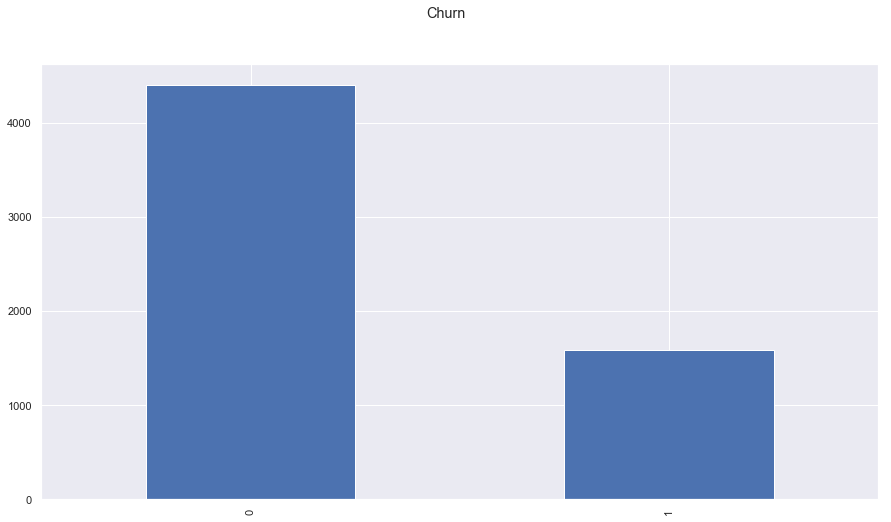

In [63]:
data_cat(df,col_int=['Churn'])

# - 
Although there is class imbalance, more data points for negative class(no churn) with positive class around 27% so lets check without sampling.

## Applying different Classification Algorithms and Comparing Results
ALL reslts compiled on excel

decisiontree
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 640x480 with 0 Axes>

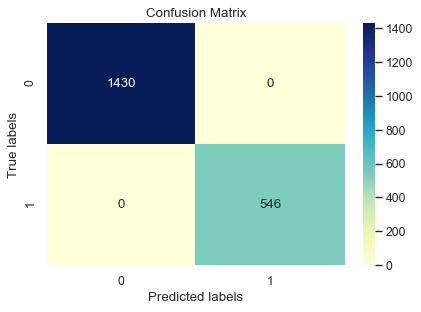


randomforest
Accuracy on Test Data is:  98.73481781376519 %
AUC score is:  0.9822011322011323
Precision:  98.33024118738405
Recall:  97.06959706959707


<Figure size 1080x576 with 0 Axes>

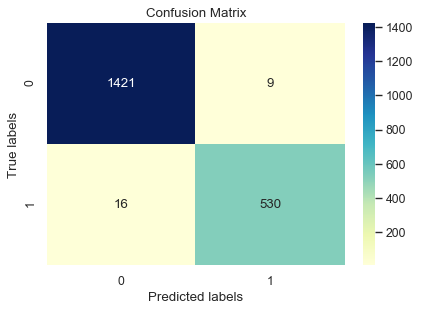


knn
Accuracy on Test Data is:  81.68016194331985 %
AUC score is:  0.7517149517149517
Precision:  69.24686192468619
Recall:  60.62271062271062


<Figure size 1080x576 with 0 Axes>

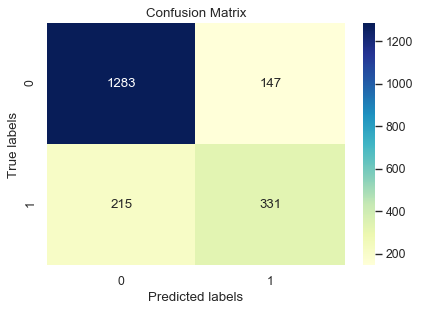


gboost
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

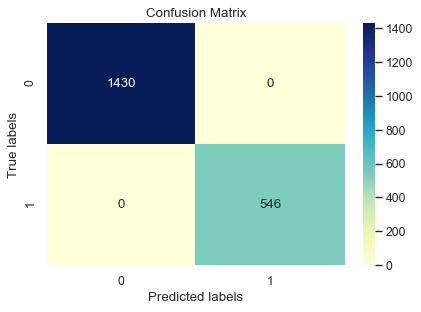


adaboost
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

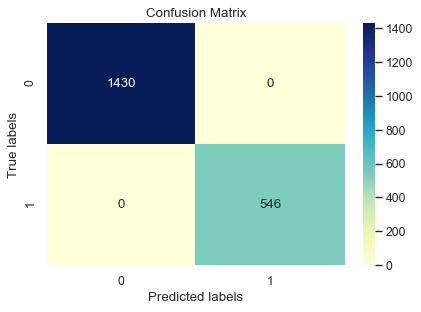


svc
Accuracy on Test Data is:  80.5161943319838 %
AUC score is:  0.6932900432900433
Precision:  74.92260061919505
Recall:  44.32234432234432


<Figure size 1080x576 with 0 Axes>

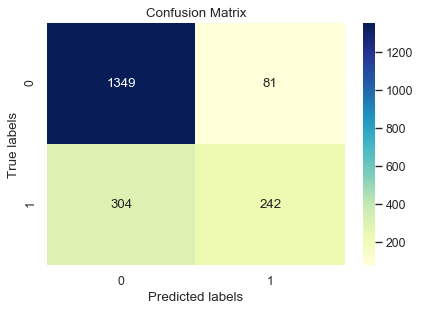


[22:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

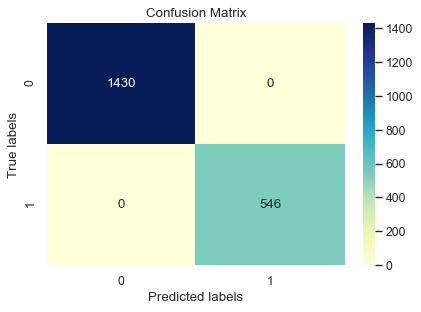


mlp
Accuracy on Test Data is:  99.9493927125506 %
AUC score is:  0.9990842490842491
Precision:  100.0
Recall:  99.81684981684981


<Figure size 1080x576 with 0 Axes>

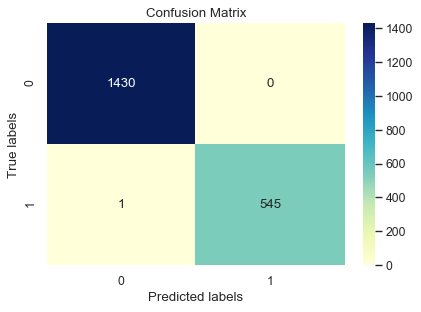


naive
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

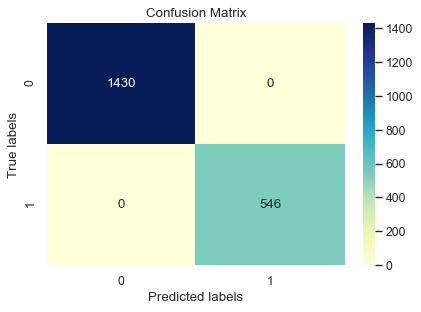


logit
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

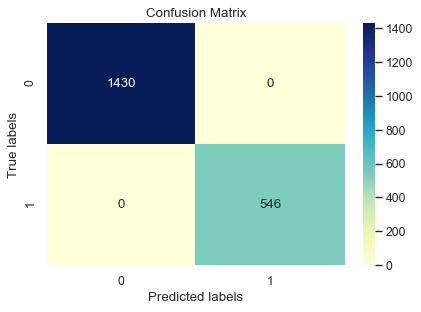

In [118]:
all_algo = ['decisiontree','randomforest','knn','gboost','adaboost','svc','xgboost','mlp','naive','logit']

i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['Churn'],algor=alg,fs=False,cv=False,ci=False)
    print(alg)
    print("Accuracy on Test Data is: ",acc*100,"%")
    print("AUC score is: ",auc)
    print("Precision: ",pre)
    print("Recall: ",recall)
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

### Suprisingly most of the Algorithms perform 100% accurace with in simple configuration

decisiontree
Accuracy on Test Data is:  100.0 %
AUC score is:  0.1
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

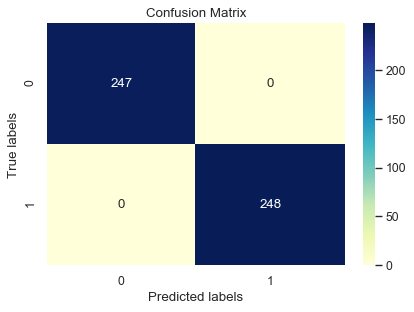


randomforest
Accuracy on Test Data is:  100.0 %
AUC score is:  0.1
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

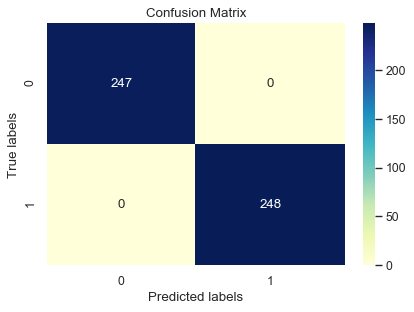


knn
Accuracy on Test Data is:  100.0 %
AUC score is:  0.1
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

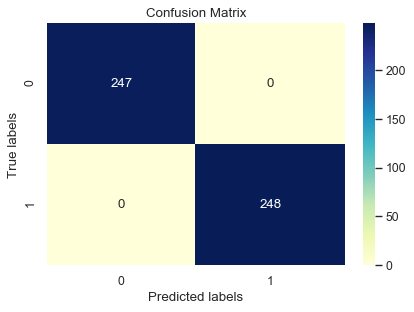


gboost
Accuracy on Test Data is:  100.0 %
AUC score is:  0.1
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

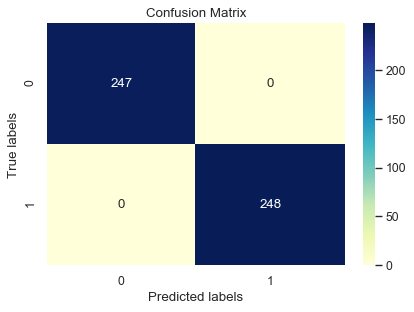


adaboost
Accuracy on Test Data is:  100.0 %
AUC score is:  0.1
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

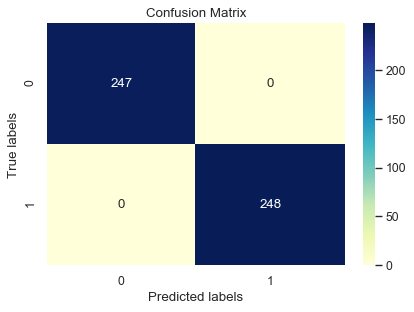


svc
Accuracy on Test Data is:  100.0 %
AUC score is:  0.1
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

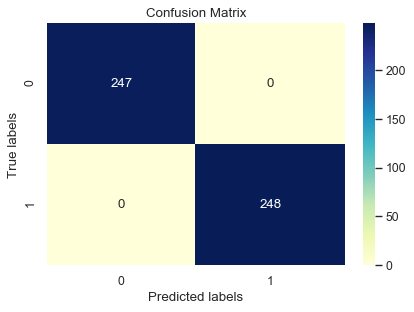


[23:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_re

<Figure size 1080x576 with 0 Axes>

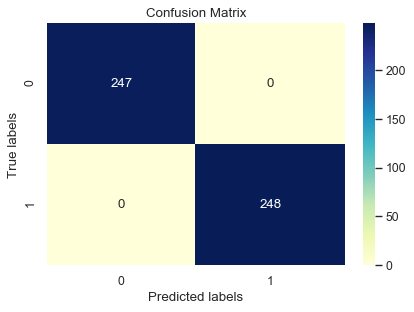


mlp
Accuracy on Test Data is:  100.0 %
AUC score is:  0.1
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

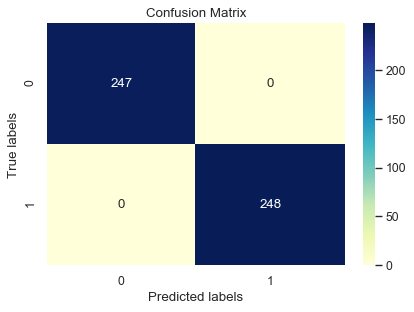


naive
Accuracy on Test Data is:  100.0 %
AUC score is:  0.1
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

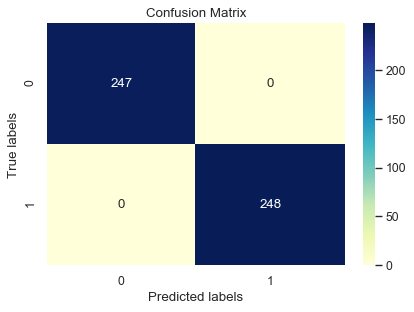


logit
Accuracy on Test Data is:  100.0 %
AUC score is:  0.1
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

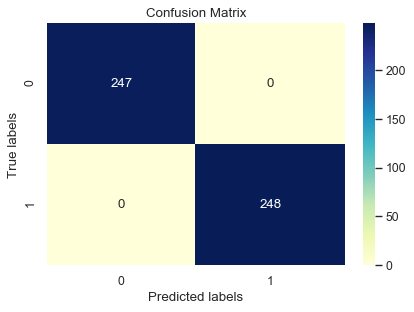

In [185]:
all_algo = ['decisiontree','randomforest','knn','gboost','adaboost','svc','xgboost','mlp','naive','logit']

i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['Churn'],algor=alg,fs=True,cv=True,ci=True,resmpl = 0.75)
    print(alg)
    print("Accuracy on Test Data is: ",acc*100,"%")
    print("AUC score is: ",auc)
    print("Precision: ",pre)
    print("Recall: ",recall)
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

decisiontree
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

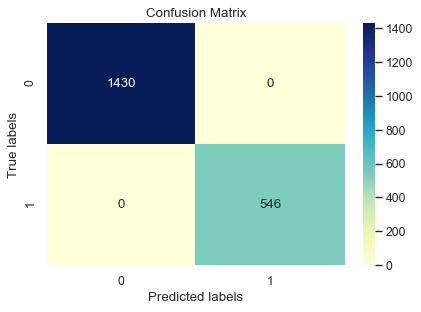


randomforest
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

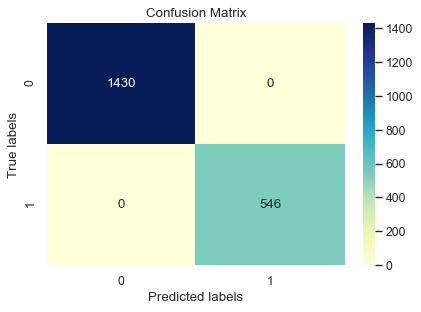


knn
Accuracy on Test Data is:  99.89878542510121 %
AUC score is:  0.9981684981684982
Precision:  100.0
Recall:  99.63369963369964


<Figure size 1080x576 with 0 Axes>

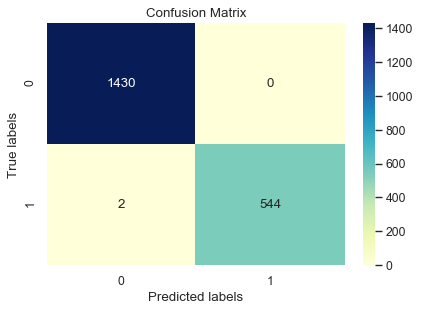


gboost
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

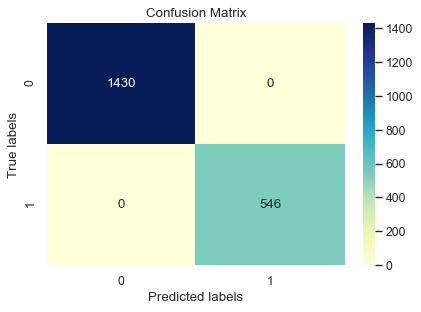


adaboost
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

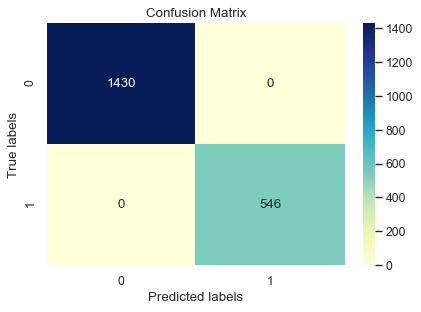


svc
Accuracy on Test Data is:  94.4838056680162 %
AUC score is:  0.9001831501831502
Precision:  100.0
Recall:  80.03663003663004


<Figure size 1080x576 with 0 Axes>

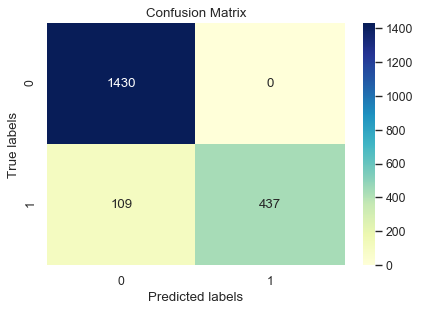


[23:50:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

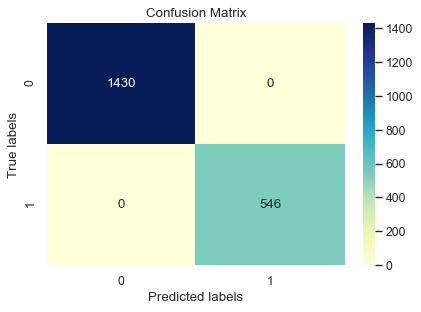


mlp
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

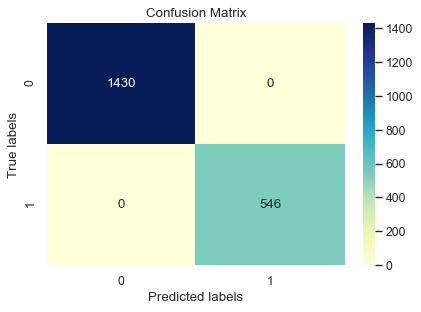


naive
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

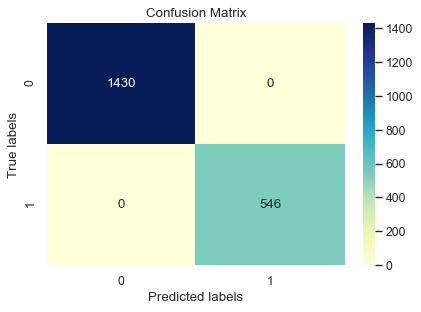


logit
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

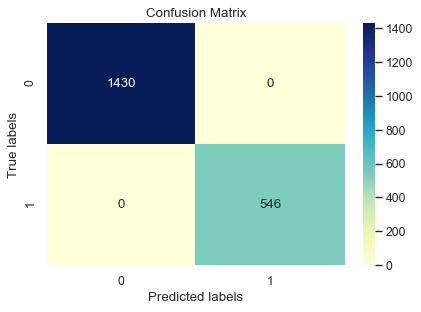

In [188]:
all_algo = ['decisiontree','randomforest','knn','gboost','adaboost','svc','xgboost','mlp','naive','logit']

i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['Churn'],algor=alg,fs=True,cv=False,ci=False,resmpl = 0.75)
    print(alg)
    print("Accuracy on Test Data is: ",acc*100,"%")
    print("AUC score is: ",auc)
    print("Precision: ",pre)
    print("Recall: ",recall)
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

decisiontree
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

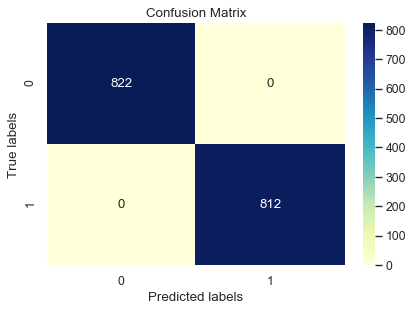


randomforest
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

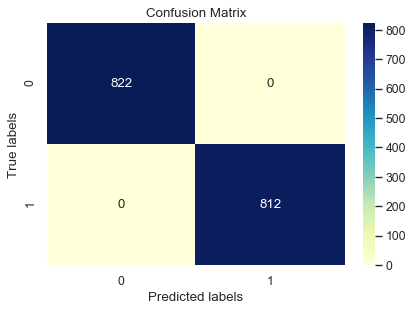


knn
Accuracy on Test Data is:  80.6609547123623 %
AUC score is:  0.8068944542327376
Precision:  77.86516853932585
Recall:  85.34482758620689


<Figure size 1080x576 with 0 Axes>

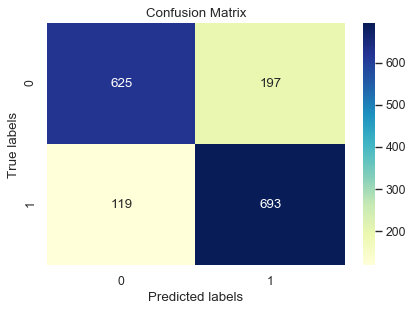


gboost
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

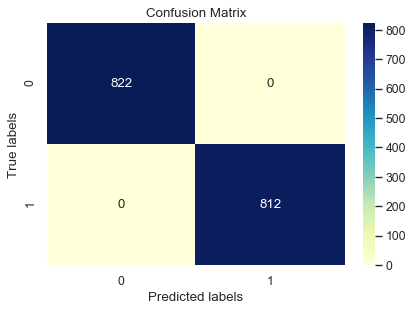


adaboost
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

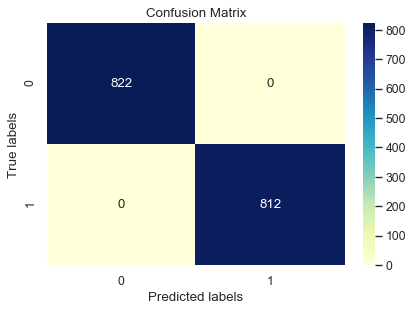


svc
Accuracy on Test Data is:  76.31578947368422 %
AUC score is:  0.7634299377943978
Precision:  73.95715896279594
Recall:  80.78817733990148


<Figure size 1080x576 with 0 Axes>

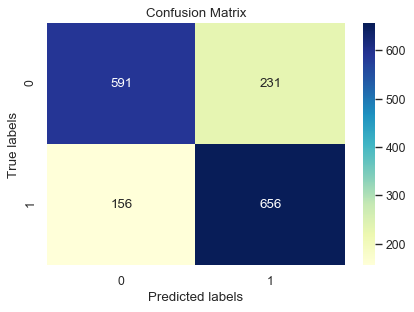


[23:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

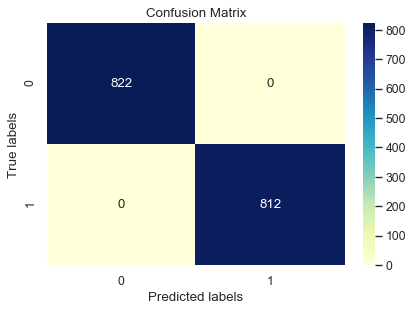


mlp
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

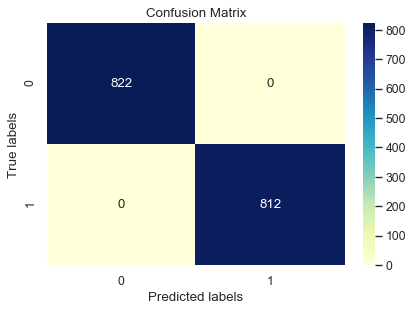


naive
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

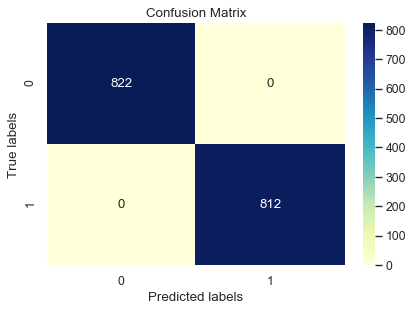


logit
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

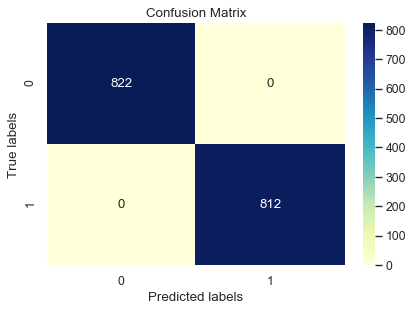

In [189]:
all_algo = ['decisiontree','randomforest','knn','gboost','adaboost','svc','xgboost','mlp','naive','logit']

i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['Churn'],algor=alg,fs=False,cv=False,ci=True,resmpl = 0.75)
    print(alg)
    print("Accuracy on Test Data is: ",acc*100,"%")
    print("AUC score is: ",auc)
    print("Precision: ",pre)
    print("Recall: ",recall)
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

decisiontree
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

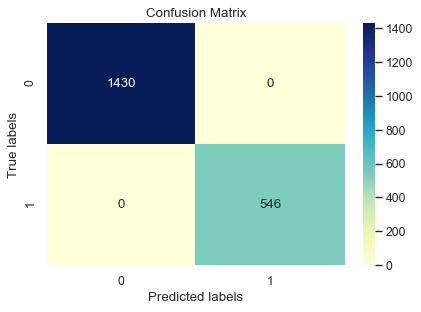


randomforest
Accuracy on Test Data is:  99.69635627530364 %
AUC score is:  0.9945054945054945
Precision:  100.0
Recall:  98.9010989010989


<Figure size 1080x576 with 0 Axes>

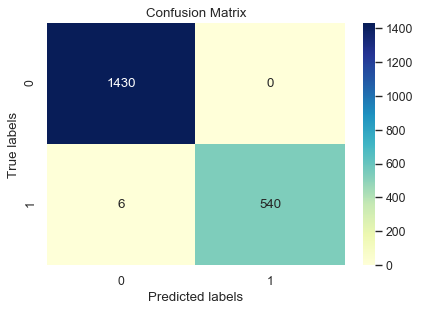


knn
Accuracy on Test Data is:  81.68016194331985 %
AUC score is:  0.7517149517149517
Precision:  69.24686192468619
Recall:  60.62271062271062


<Figure size 1080x576 with 0 Axes>

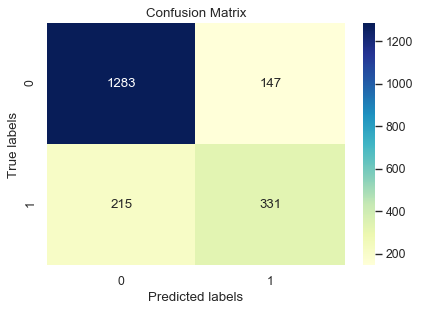


gboost
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

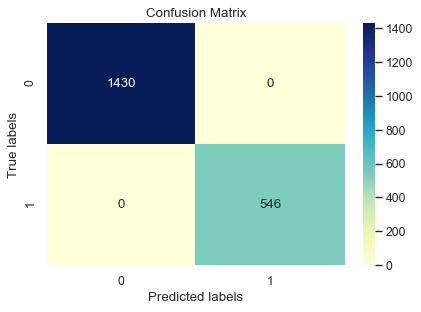


adaboost
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

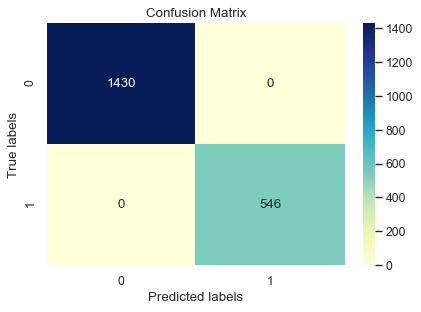


svc
Accuracy on Test Data is:  80.5161943319838 %
AUC score is:  0.6932900432900433
Precision:  74.92260061919505
Recall:  44.32234432234432


<Figure size 1080x576 with 0 Axes>

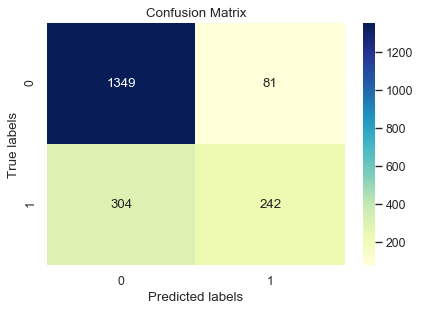


[23:57:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgboost
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

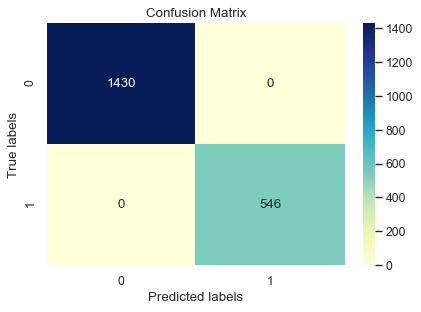


mlp
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

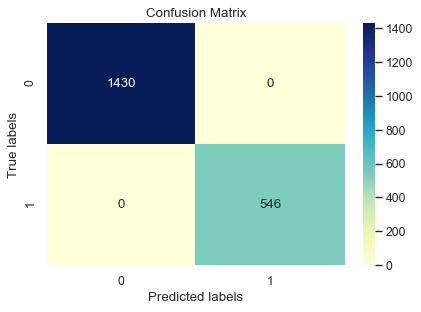


naive
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

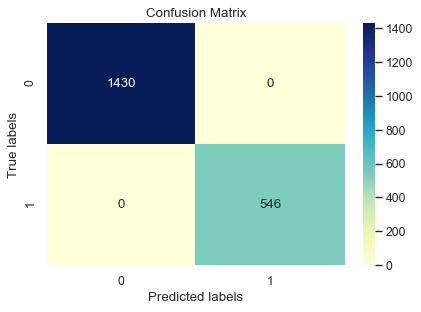


logit
Accuracy on Test Data is:  100.0 %
AUC score is:  1.0
Precision:  100.0
Recall:  100.0


<Figure size 1080x576 with 0 Axes>

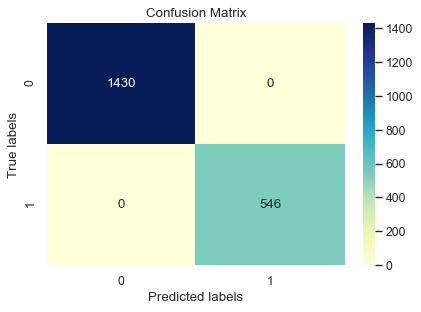

In [190]:
all_algo = ['decisiontree','randomforest','knn','gboost','adaboost','svc','xgboost','mlp','naive','logit']

i = 1
for alg in all_algo:
    plt.figure(i)
    figure(figsize=(6, 4), dpi=80)
    acc,auc,pre,recall,cm = ml_com(df,colum=['Churn'],algor=alg,fs=False,cv=True,ci=False,resmpl = 0.75)
    print(alg)
    print("Accuracy on Test Data is: ",acc*100,"%")
    print("AUC score is: ",auc)
    print("Precision: ",pre)
    print("Recall: ",recall)
    con_mat(cm,['0','1'])
    matplotlib.pyplot.show() 
    print()
    i= i+1

### Selecting Top 7 features using ANOVA F-stats
As number of features are 22 so we must select features with most influnce on output variable.
Using ANOVA F-stats methods as this methods proves to be effective when the output classification variable is catagorical and predicing varibles are numeric as in our case.
Anova feature selection method is in custome made function above

In [192]:
#First checking top features with to 10
for i in range(1,10):
    x_fs,y,fs = feature_selectk(df,i)
    # Get columns names selected by algo 
    columns = fs.get_support(indices=True)
    print("Top :",i," features")
    print(df.columns[columns].values)


Top : 1  features
['MonthlyCharges']
Top : 2  features
['StreamingMovies' 'MonthlyCharges']
Top : 3  features
['Dependents' 'StreamingMovies' 'MonthlyCharges']
Top : 4  features
['Dependents' 'StreamingMovies' 'MonthlyCharges'
 'PaymentMethod_Credit card (automatic)']
Top : 5  features
['Dependents' 'InternetService' 'StreamingMovies' 'MonthlyCharges'
 'PaymentMethod_Credit card (automatic)']
Top : 6  features
['Dependents' 'InternetService' 'DeviceProtection' 'StreamingMovies'
 'MonthlyCharges' 'PaymentMethod_Credit card (automatic)']
Top : 7  features
['Dependents' 'InternetService' 'OnlineSecurity' 'DeviceProtection'
 'StreamingMovies' 'MonthlyCharges'
 'PaymentMethod_Credit card (automatic)']
Top : 8  features
['Dependents' 'InternetService' 'OnlineSecurity' 'DeviceProtection'
 'StreamingMovies' 'Contract' 'MonthlyCharges'
 'PaymentMethod_Credit card (automatic)']
Top : 9  features
['Dependents' 'InternetService' 'OnlineSecurity' 'DeviceProtection'
 'StreamingMovies' 'Contract' 'Pa

Feature 0: 0.545594
Feature 1: 137.921763
Feature 2: 131.870327
Feature 3: 157.626363
Feature 4: 827.070674
Feature 5: 0.531195
Feature 6: 7.315384
Feature 7: 13.359747
Feature 8: 550.729907
Feature 9: 233.647081
Feature 10: 200.649716
Feature 11: 498.318003
Feature 12: 8.476187
Feature 13: 9.162338
Feature 14: 1115.883178
Feature 15: 221.663749
Feature 16: 216.244704
Feature 17: inf
Feature 18: 76.632575
Feature 19: 111.472629
Feature 20: 578.064532
Feature 21: 48.938530


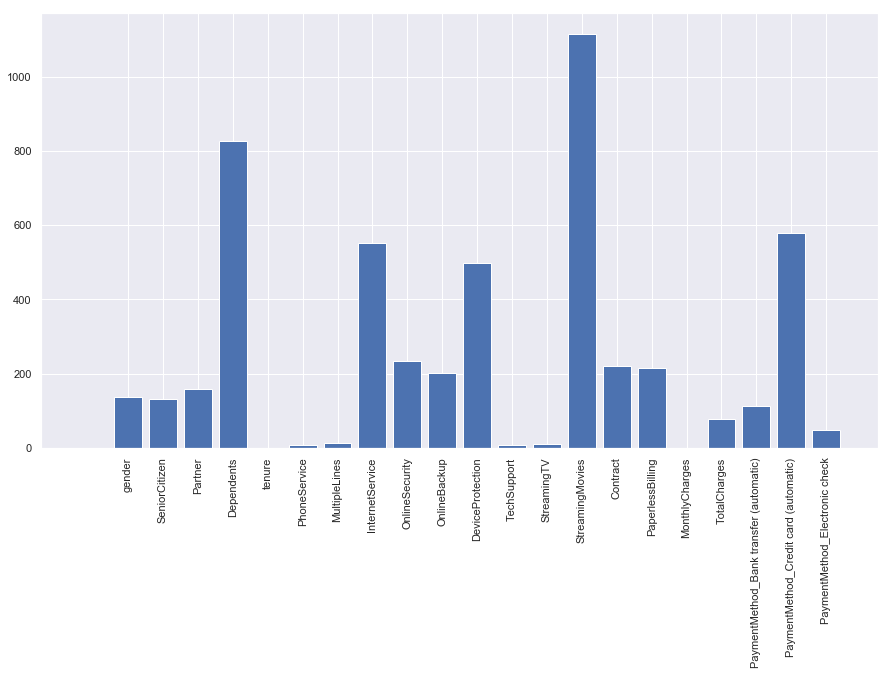

In [194]:
# Selecting top 7 features
x_fs,y,fs = feature_selectk(df,7)
# Displaying the fcore of calculating for each varible
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(range(1,len(fs.scores_)),df.iloc[:,1:len(df)-1].columns,rotation=90)
plt.show()


### Methodology:
    - For feature selection ANOVA F-stats and RFFS method is used.
    - For class imbalance problem upsampling minority class and down sampling of majority class method is used.
    - For classification KNN, Random Forest, Multilayer perceptron, Xgbost,Adabost.

### Final Results:
    -Optimum no of features is around 7-8
    -Accuracy as well as f1 score is increased by minimizing the class imbalance using up sampling of minority class.
    -Model giving maximum results(This need to be further investigation) on most of the algorithms exept KNN, random forest, Support Vector Machine